<a href="https://colab.research.google.com/github/mel418/customer-segmentation/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Customer Segmentation & Lifetime Value Analysis Project
# Let's start by importing our essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("Libraries imported successfully!")
print("Pandas version:", pd.__version__)

Libraries imported successfully!
Pandas version: 2.2.2


In [3]:
# Let's try to load the dataset directly from the web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

try:
    df = pd.read_excel(url)
    print("✅ Successfully loaded data from UCI!")
except:
    print("❌ UCI link didn't work - we'll use an alternative")
    df = None

✅ Successfully loaded data from UCI!


In [4]:
# lets explore our dataset structure
print("Dataset shape:", df.shape) # Shows (number of rows, number of columns)
print("\nColumn names:") # Lists all column names
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head() #Shows first 5 rows of data

Dataset shape: (541909, 8)

Column names:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Quick Data quality check
print("DATA QUALITY OVERVIEW")
print("="*40)

print(f"Missing values per column:")
missing = df.isnull().sum()
for col, count in missing.items():
    if count > 0:
        print(f"  {col}: {count:,} missing ({count/len(df)*100:.1f}%)")
    else:
        print(f"  {col}: ✅ No missing values")
print(f"\nUnique customers: {df['CustomerID'].nunique():,}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Countries: {df['Country'].nunique()} countries")

DATA QUALITY OVERVIEW
Missing values per column:
  InvoiceNo: ✅ No missing values
  StockCode: ✅ No missing values
  Description: 1,454 missing (0.3%)
  Quantity: ✅ No missing values
  InvoiceDate: ✅ No missing values
  UnitPrice: ✅ No missing values
  CustomerID: 135,080 missing (24.9%)
  Country: ✅ No missing values

Unique customers: 4,372
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Countries: 38 countries


In [6]:
# Data cleaning strategy
print("BEFORE CLEANING:")
print(f"Total transactions: {len(df):,}")
print(f"Transactions with CustomerID: {df['CustomerID'].notna().sum():,}")
print(f"Transactions without CustomerID: {df['CustomerID'].isna().sum():,}")

# Remove transactions without CustomerID (can't analyze customers without IDs)
df_clean = df[df['CustomerID'].notna()].copy()

print(f"\nAFTER CLEANING:")
print(f"Remaining transactions: {len(df_clean):,}")
print(f"Unique customers: {df_clean['CustomerID'].nunique():,}")
print(f"Data reduction: {(1 - len(df_clean)/len(df))*100:.1f}% removed")

# Let's also check for any other issues
print(f"\nAdditional checks:")
print(f"Negative quantities: {(df_clean['Quantity'] < 0).sum():,}")
print(f"Zero/negative prices: {(df_clean['UnitPrice'] <= 0).sum():,}")

BEFORE CLEANING:
Total transactions: 541,909
Transactions with CustomerID: 406,829
Transactions without CustomerID: 135,080

AFTER CLEANING:
Remaining transactions: 406,829
Unique customers: 4,372
Data reduction: 24.9% removed

Additional checks:
Negative quantities: 8,905
Zero/negative prices: 40


In [8]:
# handle negative quantities and zero prices
print("FINAL DATA CLEANING:")
print("="*30)

print("Before final cleaning:")
print(f"Transactions: {len(df_clean):,}")

# option 1: remove returns/refunds and bad prices for cleaner analysis
df_final = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)].copy()

print(f"\nAfter removing returns and bad prices:")
print(f"Transactions: {len(df_final):,}")
print(f"Customer: {df_final['CustomerID'].nunique():,}")

# create total amount column for each transaction
df_final['TotalAmount'] = df_final['Quantity'] * df_final['UnitPrice']

print(f"\nSample of cleaned data:")
print(df_final[['CustomerID', 'Description', 'Quantity', 'UnitPrice', 'TotalAmount']].head())

print(f"\nData summary:")
print(f"Date range: {df_final['InvoiceDate'].min()} to {df_final['InvoiceDate'].max()}")
print(f"Average transactions value: £{df_final['TotalAmount'].mean():.2f}")
print(f"Total revenue in dataset: £{df_final['TotalAmount'].sum():.2f}")

FINAL DATA CLEANING:
Before final cleaning:
Transactions: 406,829

After removing returns and bad prices:
Transactions: 397,884
Customer: 4,338

Sample of cleaned data:
   CustomerID                          Description  Quantity  UnitPrice  \
0     17850.0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
1     17850.0                  WHITE METAL LANTERN         6       3.39   
2     17850.0       CREAM CUPID HEARTS COAT HANGER         8       2.75   
3     17850.0  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39   
4     17850.0       RED WOOLLY HOTTIE WHITE HEART.         6       3.39   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34  

Data summary:
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Average transactions value: £22.40
Total revenue in dataset: £8911407.90


In [10]:
# RFM Analysis - customer segmentation
from datetime import datetime

print("Customer Segmentation - RFM Analysis")
print("="*50)

# set analysis date (day after last transaction in dataset)
analysis_date = df_final['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Analysis date: {analysis_date}")

# calculate RFM metrics for each customer
rfm = df_final.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalAmount': 'sum'                                     # Monetary
}).round(2)

# rename columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetary']

print(f"\nRFM Summary Statistics:")
print(rfm.describe())

print(f"\nSample RFM data:")
print(rfm.head(10))

Customer Segmentation - RFM Analysis
Analysis date: 2011-12-10 12:50:00

RFM Summary Statistics:
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2054.266459
std     100.014169     7.697998    8989.230441
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     307.415000
50%      51.000000     2.000000     674.485000
75%     142.000000     5.000000    1661.740000
max     374.000000   209.000000  280206.020000

Sample RFM data:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40
12352.0          36          8   2506.04
12353.0         204          1     89.00
12354.0         232          1   1079.40
12355.0         214          1    459.40
12356.0    

In [12]:
# create RFM scores (1-5 scale where 5 = best)
import numpy as np

print("Creating RFM Scores")
print("="*30)

# create RFM scores using quintiles (5 equal groups)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3,2,1]) # Lower recency = higher score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]) # Higher frequency = higher score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]) # Higher monetary = higher score

# combine into single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print("Sample customers with RFM scores:")
print(rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head(10))

# count customers in each segment
print(f"\nTop 10 RFM segments by customer count:")
segment_counts = rfm['RFM_Score'].value_counts().head(10)
for score, count in segment_counts.items():
    print(f"RFM {score}: {count:,} customers")

Creating RFM Scores
Sample customers with RFM scores:
            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
CustomerID                                                                
12346.0         326          1  77183.60       1       1       5       115
12347.0           2          7   4310.00       5       5       5       555
12348.0          75          4   1797.24       2       4       4       244
12349.0          19          1   1757.55       4       1       4       414
12350.0         310          1    334.40       1       1       2       112
12352.0          36          8   2506.04       3       5       5       355
12353.0         204          1     89.00       1       1       1       111
12354.0         232          1   1079.40       1       1       4       114
12355.0         214          1    459.40       1       1       2       112
12356.0          23          3   2811.43       4       3       5       435

Top 10 RFM segments by customer count:
RFM 55

In [15]:
# Create meaningful segment names
print("🎯 CUSTOMER SEGMENTS WITH BUSINESS NAMES")
print("="*50)

def rfm_segment_names(row):
    """Convert RFM scores to business-friendly names"""
    if row['RFM_Score'] in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif row['RFM_Score'] in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal Customers'
    elif row['RFM_Score'] in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451']:
        return 'Potential Loyalists'
    elif row['RFM_Score'] in ['512', '511', '422', '421', '412', '411', '311']:
        return 'New Customers'
    elif row['RFM_Score'] in ['155', '154', '144', '214', '215', '115', '114']:
        return 'At Risk'
    elif row['RFM_Score'] in ['331', '321', '231', '241', '251']:
        return 'Hibernating'
    else:
        return 'Others'

# Apply segment names
rfm['Segment'] = rfm.apply(rfm_segment_names, axis=1)

# Segment analysis - FIXED VERSION
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)

# Add customer count separately
segment_summary[('Customer_Count', '')] = rfm.groupby('Segment').size()

# Flatten column names
segment_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Total_Revenue', 'Customer_Count']
segment_summary = segment_summary.sort_values('Customer_Count', ascending=False)

print("Customer Segments Summary:")
print(segment_summary)

print(f"\nSegment Distribution:")
for segment, count in rfm['Segment'].value_counts().items():
    percentage = (count / len(rfm)) * 100
    print(f"{segment}: {count} customers ({percentage:.1f}%)")

🎯 CUSTOMER SEGMENTS WITH BUSINESS NAMES
Customer Segments Summary:
                     Avg_Recency  Avg_Frequency  Avg_Monetary  Total_Revenue  \
Segment                                                                        
Others                    138.69           2.05        778.87     1943292.44   
Champions                  11.46          12.09       6712.97     5638898.48   
Loyal Customers            37.01           5.27       2340.97     1001933.95   
New Customers              28.66           1.07        223.52       60574.68   
Potential Loyalists         7.13           2.75        490.49       61801.77   
Hibernating                72.66           1.64        168.19       19845.86   
At Risk                   211.25           3.08       3084.35      185060.72   

                     Customer_Count  
Segment                              
Others                         2495  
Champions                       840  
Loyal Customers                 428  
New Customers         

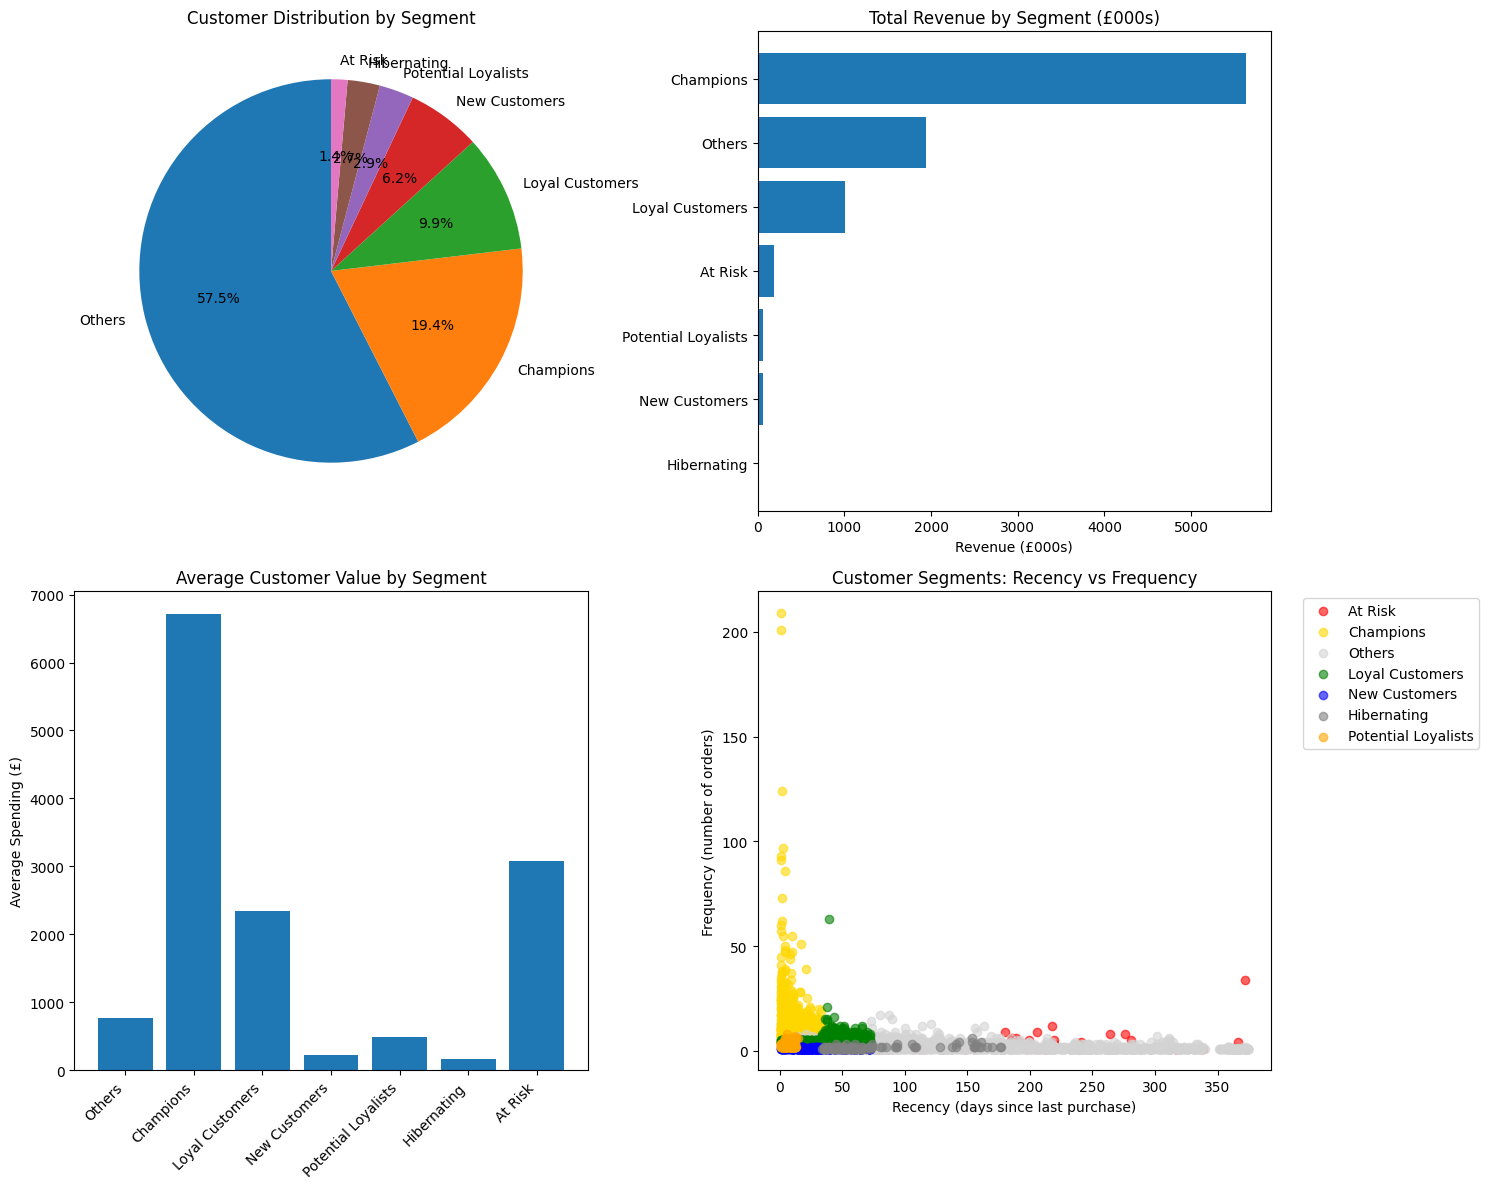


🚀 STRATEGIC RECOMMENDATIONS:
1. URGENT: Win-back campaign for 'At Risk' customers (£185K revenue at stake)
2. Reward 'Champions' with VIP program (19% of customers, 29% of revenue)
3. Convert 'New Customers' with onboarding sequence
4. Upsell 'Loyal Customers' with complementary products
5. Re-engage 'Hibernating' customers with special offers


In [17]:
import matplotlib.pyplot as plt

# create a comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. customer count by segment
segment_counts = rfm['Segment'].value_counts()
ax1.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Customer Distribution by Segment')

# 2. revenue by segment
revenue_by_segment = segment_summary.sort_values('Total_Revenue', ascending=True)
ax2.barh(revenue_by_segment.index, revenue_by_segment['Total_Revenue']/1000)
ax2.set_title('Total Revenue by Segment (£000s)')
ax2.set_xlabel('Revenue (£000s)')

# 3. avg monetary value by segment
ax3.bar(segment_summary.index, segment_summary['Avg_Monetary'])
ax3.set_title('Average Customer Value by Segment')
ax3.set_ylabel('Average Spending (£)')
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. recency vs frequency scatter
colors = {'Champions': 'gold', 'Loyal Customers': 'green', 'At Risk': 'red',
          'New Customers': 'blue', 'Potential Loyalists': 'orange',
          'Hibernating': 'gray', 'Others': 'lightgray'}

for segment in rfm['Segment'].unique():
    segment_data = rfm[rfm['Segment'] == segment]
    ax4.scatter(segment_data['Recency'], segment_data['Frequency'],
                c=colors.get(segment, 'black'), label=segment, alpha=0.6)

ax4.set_title('Customer Segments: Recency vs Frequency')
ax4.set_xlabel('Recency (days since last purchase)')
ax4.set_ylabel('Frequency (number of orders)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n🚀 STRATEGIC RECOMMENDATIONS:")
print("="*40)
print("1. URGENT: Win-back campaign for 'At Risk' customers (£185K revenue at stake)")
print("2. Reward 'Champions' with VIP program (19% of customers, 29% of revenue)")
print("3. Convert 'New Customers' with onboarding sequence")
print("4. Upsell 'Loyal Customers' with complementary products")
print("5. Re-engage 'Hibernating' customers with special offers")